In [40]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [41]:
warnings.filterwarnings('ignore')

In [42]:
column_names = ['user_id','item_id','rating','timestamp']
df=pd.read_csv(r"E:\dev\Data science\Data-science-master\Movie Recommendation System\ml-100k\u.data",sep='\t',names=column_names)  

In [43]:
df.head()
df.shape

(100000, 4)

In [44]:
print(df['user_id'].nunique())
print(df['item_id'].nunique())
## number of unique users and movies

943
1682


In [45]:
movie_titles = pd.read_csv(r"E:\dev\Data science\Data-science-master\Movie Recommendation System\ml-100k\u.item",sep='\|',header=None)  

In [46]:
movie_titles = movie_titles[[0,1]]
movie_titles.shape


(1682, 2)

In [47]:
movie_titles.columns = ['item_id','title']
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [48]:
df = pd.merge(df,movie_titles, on ='item_id')
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [49]:
df.shape

(100000, 5)

## Exploratory Data Analysis

In [50]:
import seaborn as sns
sns.set_style('white')

In [57]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [61]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [65]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [70]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])
ratings.sort_values(by='rating',ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


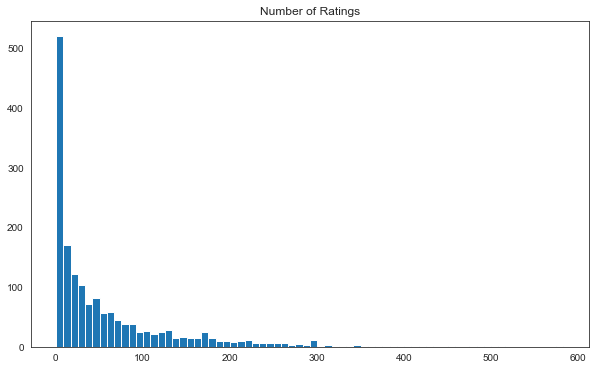

In [74]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'],bins=70)
plt.title('Number of Ratings')
plt.show()

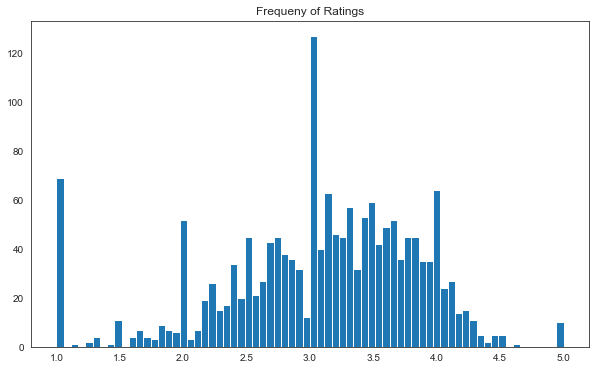

In [76]:
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'],bins=70)
plt.title('Frequeny of Ratings')
plt.show()

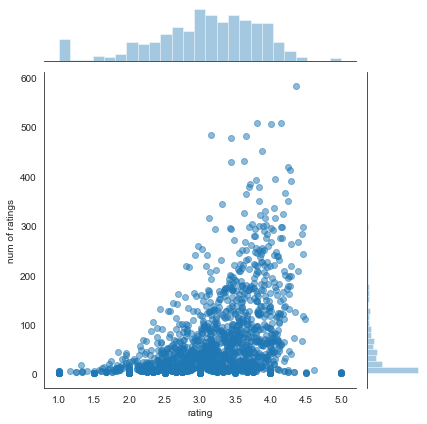

In [78]:
sns.jointplot(x='rating' , y='num of ratings' , data=ratings, alpha=0.5)

## Creating Movie REcommendation

In [79]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [81]:
moviemat =df.pivot_table(index='user_id',columns='title',values='rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
moviemat.shape

(943, 1664)

In [85]:
ratings.sort_values('num of ratings',ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [87]:
startwars_user_ratings=moviemat['Star Wars (1977)']
startwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [90]:
similartostarwars=moviemat.corrwith(startwars_user_ratings)
similartostarwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [98]:
corr_of_starwars=pd.DataFrame(similartostarwars,columns=['correlation'])
corr_of_starwars = corr_of_starwars.dropna()
corr_of_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [100]:
corr_of_starwars = corr_of_starwars.join(ratings['num of ratings'])
corr_of_starwars.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [103]:
corr_of_starwars[corr_of_starwars['num of ratings']>50].sort_values('correlation',ascending=False)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Giant (1956),0.488093,51
...,...,...
Excess Baggage (1997),-0.239936,52
"Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)",-0.241561,54
"Walk in the Clouds, A (1995)",-0.257007,63


## Predict Function

In [115]:
def predict_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similarmovie=moviemat.corrwith(movie_user_ratings)
    corr_of_movie=pd.DataFrame(similarmovie,columns=['correlation'])
    corr_of_movie = corr_of_movie.dropna()
    corr_of_movie = corr_of_movie.join(ratings['num of ratings'])
    predictions =corr_of_movie[corr_of_movie['num of ratings']>50].sort_values('correlation',ascending=False)
    print(predictions.head(10))

In [116]:
predict_movies('Toy Story (1995)')

                                             correlation  num of ratings
title                                                                   
Toy Story (1995)                                1.000000             452
Raise the Red Lantern (1991)                    0.641535              58
Flubber (1997)                                  0.558389              53
Jackal, The (1997)                              0.557876              87
Craft, The (1996)                               0.549100             104
Island of Dr. Moreau, The (1996)                0.490491              57
Notorious (1946)                                0.486031              52
Cyrano de Bergerac (1990)                       0.480052              66
Beautician and the Beast, The (1997)            0.466064              86
Winnie the Pooh and the Blustery Day (1968)     0.463056              75
